In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [3]:
import kagglehub

# Download the dataset
path = kagglehub.dataset_download("nishan192/letterrecognition-using-svm")

print("Path to dataset files:", path)


100%|██████████| 214k/214k [00:00<00:00, 81.5MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/nishan192/letterrecognition-using-svm/versions/1


In [4]:
import os

print(os.listdir(path))

['letter-recognition.csv']


In [5]:
df = pd.read_csv(os.path.join(path, "letter-recognition.csv"))
print(df.head())

  letter  xbox   ybox   width   height  onpix   xbar   ybar   x2bar  y2bar   \
0      T      2      8       3       5       1      8     13      0       6   
1      I      5     12       3       7       2     10      5      5       4   
2      D      4     11       6       8       6     10      6      2       6   
3      N      7     11       6       6       3      5      9      4       6   
4      G      2      1       3       1       1      8      6      6       6   

   xybar   x2ybar  xy2bar  xedge   xedgey  yedge   yedgex  
0       6      10       8       0       8       0       8  
1      13       3       9       2       8       4      10  
2      10       3       7       3       7       3       9  
3       4       4      10       6      10       2       8  
4       6       5       9       1       7       5      10  


In [7]:
# Cleaning column names
df.columns = df.columns.str.strip()

# Splitting features and target
X = df.drop('letter', axis=1)
y = df['letter']


In [8]:
# Label encoding
le = LabelEncoder()
y = le.fit_transform(y)

In [9]:
#Making train and test splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [10]:
# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
# Defining the models
svm = SVC(kernel='rbf', probability=True)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)
lr = LogisticRegression(max_iter=1000)

In [12]:
# Voting Ensemble
voting = VotingClassifier(estimators=[
    ('SVM', svm),
    ('RF', rf),
    ('KNN', knn),
    ('LR', lr)
], voting='soft')


Training SVM...
SVM Accuracy: 0.9485
              precision    recall  f1-score   support

           A       0.97      0.96      0.96       158
           B       0.87      0.95      0.91       153
           C       0.97      0.97      0.97       147
           D       0.90      0.96      0.93       161
           E       0.92      0.95      0.94       154
           F       0.94      0.94      0.94       155
           G       0.93      0.97      0.95       155
           H       0.86      0.86      0.86       147
           I       0.98      0.90      0.94       151
           J       0.94      0.97      0.95       149
           K       0.94      0.95      0.95       148
           L       0.99      0.93      0.96       152
           M       0.99      0.95      0.97       158
           N       0.95      0.94      0.94       157
           O       0.93      0.93      0.93       150
           P       0.99      0.93      0.96       161
           Q       0.97      0.96      0.96

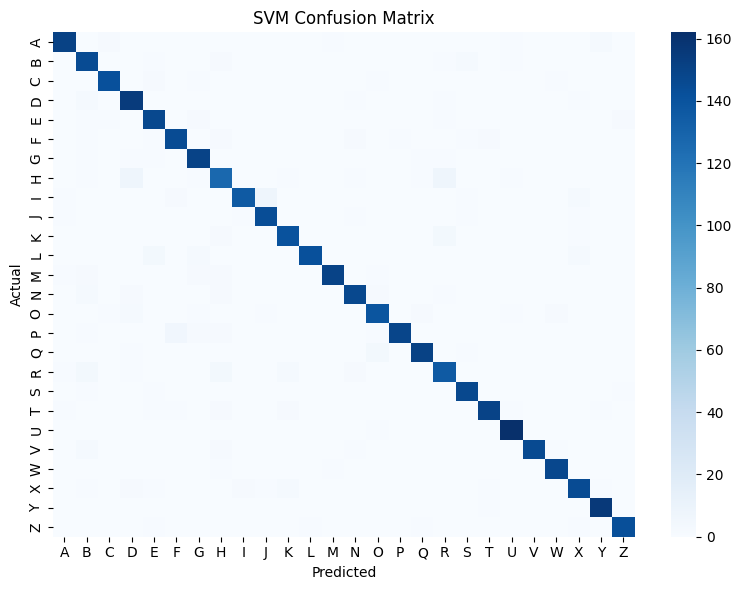


Training Random Forest...
Random Forest Accuracy: 0.9660
              precision    recall  f1-score   support

           A       0.99      0.99      0.99       158
           B       0.93      0.97      0.95       153
           C       0.97      0.96      0.97       147
           D       0.91      0.99      0.95       161
           E       0.95      0.97      0.96       154
           F       0.94      0.95      0.95       155
           G       0.95      0.95      0.95       155
           H       0.93      0.86      0.90       147
           I       0.98      0.93      0.96       151
           J       0.96      0.97      0.97       149
           K       0.93      0.96      0.95       148
           L       1.00      0.98      0.99       152
           M       0.99      0.99      0.99       158
           N       0.99      0.96      0.97       157
           O       0.97      0.97      0.97       150
           P       0.98      0.96      0.97       161
           Q       0.95

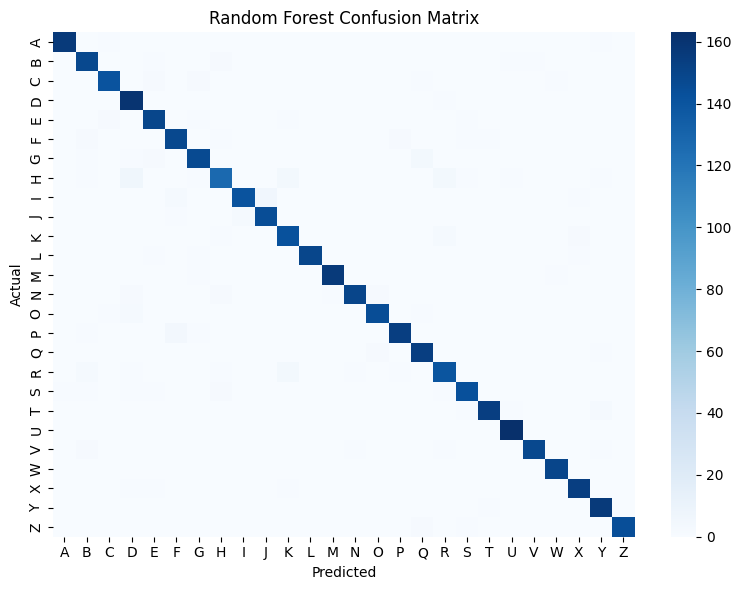


Training KNN...
KNN Accuracy: 0.9433
              precision    recall  f1-score   support

           A       1.00      0.99      0.99       158
           B       0.86      0.95      0.90       153
           C       0.95      0.96      0.95       147
           D       0.88      0.98      0.93       161
           E       0.87      0.95      0.91       154
           F       0.94      0.90      0.92       155
           G       0.94      0.93      0.93       155
           H       0.86      0.85      0.86       147
           I       0.95      0.95      0.95       151
           J       0.95      0.95      0.95       149
           K       0.92      0.90      0.91       148
           L       0.98      0.95      0.97       152
           M       0.98      0.96      0.97       158
           N       0.95      0.93      0.94       157
           O       0.90      0.94      0.92       150
           P       0.97      0.93      0.95       161
           Q       0.99      0.95      0.97

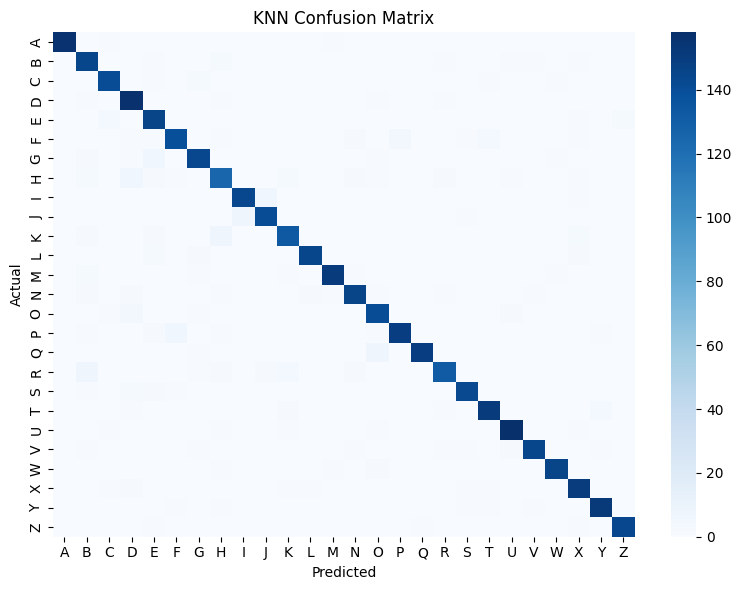


Training Logistic Regression...
Logistic Regression Accuracy: 0.7742
              precision    recall  f1-score   support

           A       0.90      0.90      0.90       158
           B       0.67      0.74      0.70       153
           C       0.87      0.83      0.85       147
           D       0.78      0.80      0.79       161
           E       0.69      0.81      0.74       154
           F       0.74      0.77      0.75       155
           G       0.70      0.57      0.63       155
           H       0.57      0.50      0.53       147
           I       0.87      0.78      0.82       151
           J       0.85      0.83      0.84       149
           K       0.75      0.70      0.72       148
           L       0.80      0.82      0.81       152
           M       0.91      0.89      0.90       158
           N       0.84      0.83      0.83       157
           O       0.62      0.63      0.62       150
           P       0.84      0.81      0.83       161
           

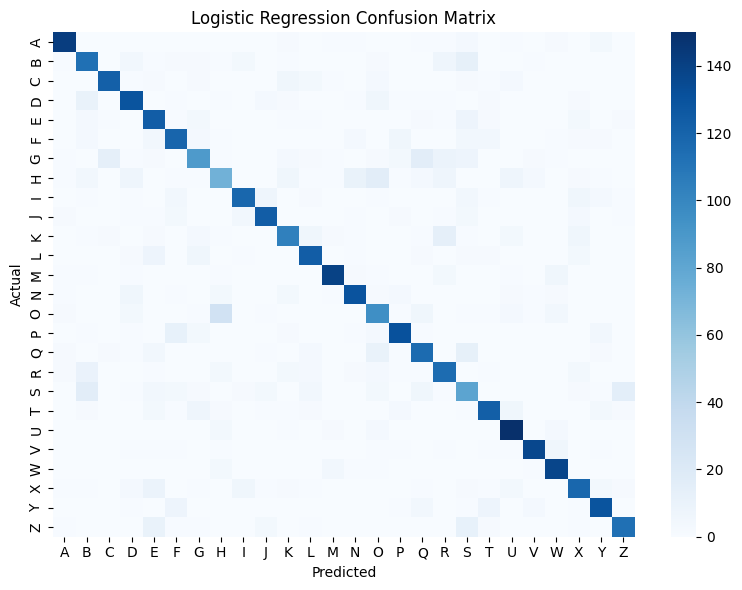


Training Voting Ensemble...
Voting Ensemble Accuracy: 0.9613
              precision    recall  f1-score   support

           A       0.99      0.97      0.98       158
           B       0.91      0.95      0.93       153
           C       0.99      0.97      0.98       147
           D       0.90      0.98      0.94       161
           E       0.93      0.98      0.96       154
           F       0.95      0.92      0.94       155
           G       0.95      0.97      0.96       155
           H       0.92      0.90      0.91       147
           I       0.99      0.91      0.95       151
           J       0.92      0.99      0.95       149
           K       0.96      0.95      0.96       148
           L       0.99      0.93      0.96       152
           M       0.99      0.97      0.98       158
           N       0.95      0.94      0.95       157
           O       0.97      0.94      0.95       150
           P       0.99      0.95      0.97       161
           Q       

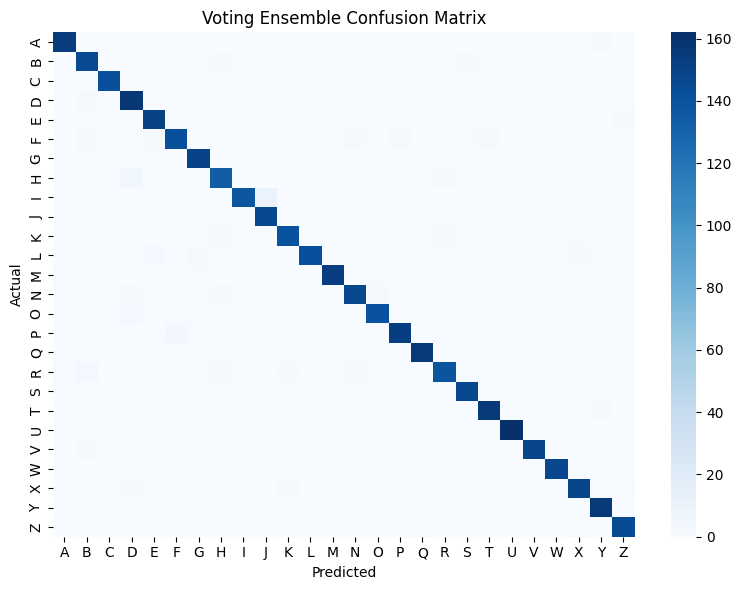

In [13]:
# Training and evaluating each model
models = {
    'SVM': svm,
    'Random Forest': rf,
    'KNN': knn,
    'Logistic Regression': lr,
    'Voting Ensemble': voting
}

for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred, target_names=le.classes_))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_, fmt='d')
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()